## Data and Setup

____
### Các thư viện cần thiết

In [17]:
# Import các thư viện
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error


### Read data

In [18]:
data = pd.read_csv('data_clean.csv')

In [19]:
data.head()

,price,origin,condition,carType,km,carColor,interiorColor,carDoor,carSeat,gear,wheelDrive,carMaker,yearsManufacturing,capacity,carEngine
0,2490.0,Nhập khẩu,Xe đã dùng,SUV,40000,Đỏ,Nâu,5,5.0,Số tự động,"AWD,4 bánh toàn thời gian",Lexus,2016,2.0,Xăng
1,825.0,Nhập khẩu,Xe đã dùng,Bán tải / Pickup,0,Đồng,Nâu,4,5.0,Số tự động,"4WD,Dẫn động 4 bánh",Ford,2017,3.2,Dầu
2,619.0,Lắp ráp trong nước,Xe mới,Bán tải / Pickup,0,Trắng,Đen,4,5.0,Số tay,"RFD,Dẫn động cầu sau",Ford,2022,2.2,Dầu
3,1660.0,Lắp ráp trong nước,Xe đã dùng,Sedan,48000,Đen,Đen,4,5.0,Số tự động,"RFD,Dẫn động cầu sau",Mercedes,2017,2.0,Xăng
4,500.0,Lắp ráp trong nước,Xe mới,Sedan,0,Trắng,Đen,4,5.0,Số tự động,"FWD,Dẫn động cầu trước",Hyundai,2021,1.4,Xăng


### Làm sạch dữ liệu

In [20]:
data.isnull().sum()

price                 0
 origin               0
condition             0
carType               0
km                    0
carColor              0
interiorColor         0
carDoor               0
carSeat               0
gear                  0
wheelDrive            0
carMaker              0
yearsManufacturing    0
capacity              0
carEngine             0
dtype: int64

==> Dataset không có dữ liệu trống

# Khảo sát ngoại lệ

Text(0, 0.5, 'Density')

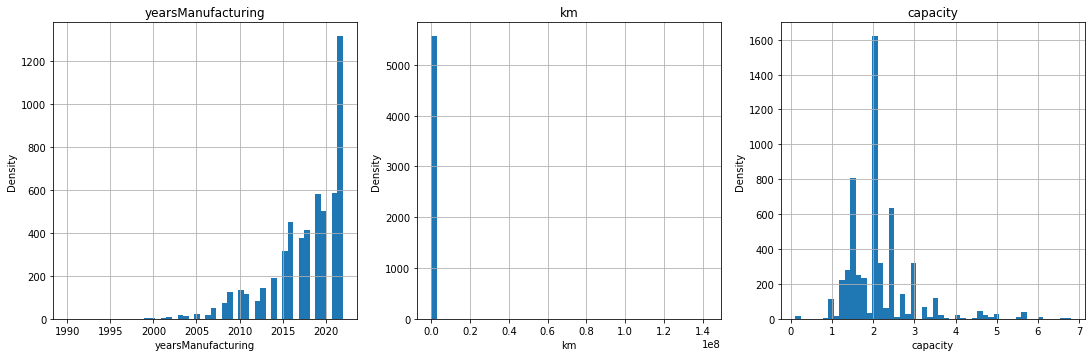

In [21]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=data.yearsManufacturing.hist(bins=50)
figure.set_title('yearsManufacturing')
figure.set_xlabel('yearsManufacturing')
figure.set_ylabel('Density')
plt.subplot(2,4,2)

figure=data.km.hist(bins=50)
figure.set_title('km')
figure.set_xlabel('km')
figure.set_ylabel('Density')

plt.subplot(2,4,3)
figure=data.capacity.hist(bins=50)
figure.set_title('capacity')
figure.set_xlabel('capacity')
figure.set_ylabel('Density')

## Xử lý ngoại lệ

In [22]:
def outliers(data):

    q3 , q1 = np.percentile(data['km'], [75,25])
    IQR = q3 - q1
    upper_bridge = q3 + 3 * IQR
    lower_bridge = q1 - 3 * IQR
    data.loc[data['km'] >= upper_bridge, 'km'] = round(upper_bridge)
    # data.loc[data['km'] <= lower_bridge, 'km'] = round(lower_bridge)
    
    q3 , q1 = np.percentile(data['yearsManufacturing'], [75,25])
    IQR = q3 - q1
    upper_bridge = q3 + 3 * IQR
    lower_bridge = q1 - 3 * IQR
    # data.loc[data['yearsManufacturing'] >= upper_bridge, 'yearsManufacturing'] = round(upper_bridge)
    data.loc[data['yearsManufacturing'] <= lower_bridge, 'yearsManufacturing'] = round(lower_bridge)

    q3 , q1 = np.percentile(data['capacity'], [75,25])
    IQR = q3 - q1
    upper_bridge = q3 + 3 * IQR
    lower_bridge = q1 - 3 * IQR
    data.loc[data['capacity'] >= upper_bridge, 'capacity'] = round(upper_bridge)
    # data.loc[data['capacity'] <= lower_bridge, 'capacity'] = round(lower_bridge)
    return (data)

data=outliers(data)

Text(0, 0.5, 'Density')

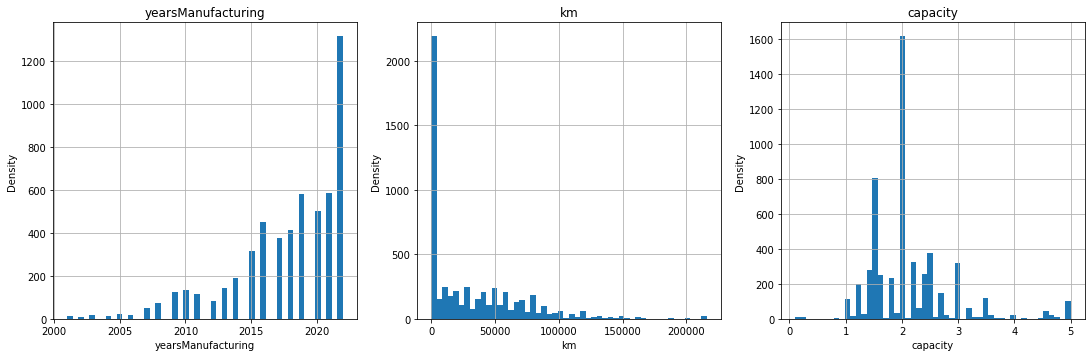

In [69]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=data.yearsManufacturing.hist(bins=50)
figure.set_title('yearsManufacturing')
figure.set_xlabel('yearsManufacturing')
figure.set_ylabel('Density')
plt.subplot(2,4,2)

figure=data.km.hist(bins=50)
figure.set_title('km')
figure.set_xlabel('km')
figure.set_ylabel('Density')

plt.subplot(2,4,3)
figure=data.capacity.hist(bins=50)
figure.set_title('capacity')
figure.set_xlabel('capacity')
figure.set_ylabel('Density')

# Encoder

## Mã hoá dữ liệu với LabelEncoder()

In [23]:
def label_encode_columns(df, columns):
    for col in columns:
        df[col] = LabelEncoder().fit_transform(df[col])

    return df

data = label_encode_columns(data,[' origin', 'condition', 'carType', 'carColor', 'interiorColor', 'gear','carEngine', 'wheelDrive', 'carMaker'])

## Tương quan của dữ liệu sau khi được encode

<AxesSubplot:>

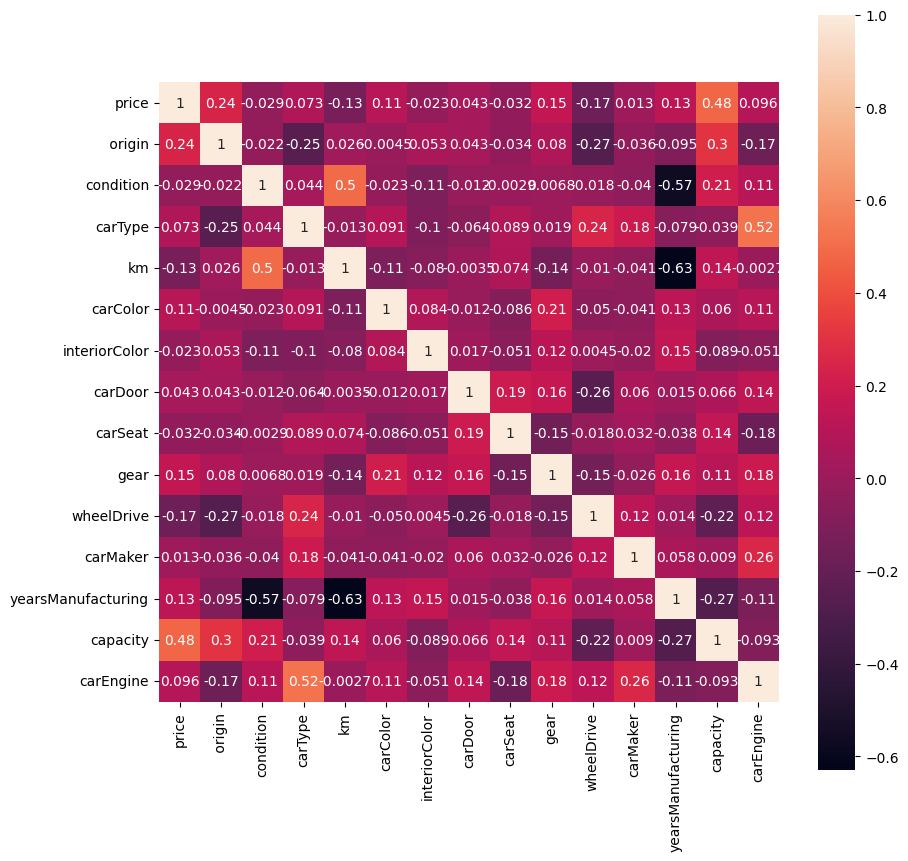

In [24]:
plt.figure(1, figsize=(10,10), dpi = 100)
sns.heatmap(data.corr(), 
            square=True,
            annot=True)

## Building Model

In [25]:
data

,price,origin,condition,carType,km,carColor,interiorColor,carDoor,carSeat,gear,wheelDrive,carMaker,yearsManufacturing,capacity,carEngine
0,2490.0,1,1,5,40000,15,8,5,5.0,2,2,23,2016,2.0,3
1,825.0,1,1,0,0,16,8,4,5.0,2,1,12,2017,3.2,0
2,619.0,0,0,0,0,9,13,4,5.0,1,4,12,2022,2.2,0
3,1660.0,0,1,6,48000,14,13,4,5.0,2,4,29,2017,2.0,3
4,500.0,0,0,6,0,9,13,4,5.0,2,3,15,2021,1.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,626.0,1,1,5,20000,14,13,5,7.0,2,3,32,2021,1.5,3
5556,3330.0,1,1,5,0,2,5,5,5.0,2,2,23,2020,2.0,3
5557,1650.0,1,1,4,35791,12,10,5,5.0,2,3,30,2018,2.0,3
5558,240.0,0,1,6,0,0,13,4,5.0,1,3,42,2009,1.5,3


## Chia tập dữ liệu 

In [36]:
df_train, df_test = train_test_split(data, test_size = 0.2, random_state=42)

print(df_train.shape)
print(df_test.shape)

X_train = df_train.copy()
X_test = df_test.copy()
#Dividing data into X and y variables
y_train = X_train.pop('price')
y_test = X_test.pop('price')

(4448, 15)
(1112, 15)


## Giảm chiều dữ liệu

In [37]:
sc = MinMaxScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns)

X_train

,origin,condition,carType,km,carColor,interiorColor,carDoor,carSeat,gear,wheelDrive,carMaker,yearsManufacturing,capacity,carEngine
0,1.0,1.0,0.750,0.000000,0.8750,0.333333,0.666667,0.086957,1.0,0.75,0.875000,0.857143,0.387755,0.75
1,0.0,1.0,0.750,0.074074,0.5625,0.866667,0.666667,0.086957,1.0,0.75,0.875000,0.952381,0.346939,0.75
2,0.0,1.0,1.000,0.000000,0.7500,0.200000,0.333333,0.717391,0.5,1.00,0.354167,0.809524,0.346939,0.00
3,0.0,1.0,0.375,0.055556,0.1250,0.200000,0.833333,0.152174,0.5,1.00,0.875000,0.523810,0.387755,0.75
4,0.0,1.0,0.625,0.092593,0.8750,0.533333,0.833333,0.130435,1.0,1.00,0.916667,0.904762,0.387755,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443,0.0,1.0,0.750,0.324074,0.8750,0.866667,0.666667,0.086957,1.0,0.75,0.875000,0.666667,0.489796,0.75
4444,1.0,1.0,0.000,0.370370,0.0625,0.466667,0.666667,0.086957,1.0,0.25,0.250000,0.714286,0.632653,0.00
4445,1.0,0.0,0.750,0.000000,0.5625,0.866667,0.666667,0.086957,1.0,0.75,0.541667,1.000000,0.285714,0.75
4446,0.0,1.0,0.625,0.000000,0.5625,0.400000,0.833333,0.086957,1.0,0.50,0.583333,0.857143,0.489796,0.75


## Mô hình Linear Regression

### Chọn đặc trưng để đánh giá mô hình

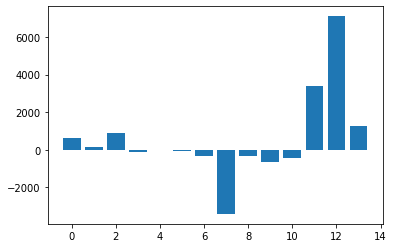

In [38]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [42]:
X_selected_cols = [' origin', 'condition', 'carType', 'capacity','carEngine', 'yearsManufacturing']
# X = data.drop(['price', 'condition', 'km', 'interiorColor', 'carSeat', 'wheelDrive'], axis = 1).copy()
X_train_LR = X_train[X_selected_cols].copy()
X_test_LR = X_test[X_selected_cols].copy()

### Đánh giá mô hình

In [61]:
# Dùng LinerRegression
LR = LinearRegression()
LR.fit(X_train_LR, y_train)
# Dự đoán
predict_train = LR.predict(X_train_LR)
predict_test  = LR.predict(X_test_LR)
rs = {
  "Price_Test": y_test[:30],
  "Price": predict_test[:30]
}
df = pd.DataFrame(rs)

print("Mean Y_test: {0}".format(np.mean(y_test)))
print("rmse of test set : {0}".format(mean_squared_error(y_test,predict_test)**0.5))
print("mae of test set : {0}".format(mean_absolute_error(y_true = y_test,y_pred = predict_test)))

Mean Y_test: 1330.8705035971223
rmse of test set : 1408.3258088231755
mae of test set : 786.3476432701431


- Độ lệch giữa giá trị dự báo và giá trị thực tế cao (RMSE)
- Sai số giữa 2 giá trị dự báo và giá trị thực tế 

Text(0.5, 1.0, 'Linear Regression Predict')

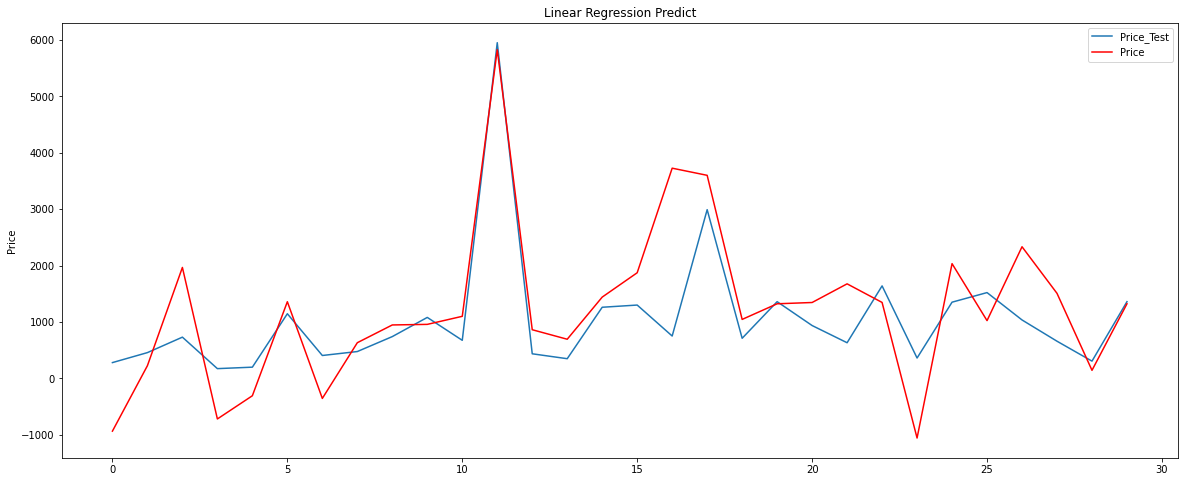

In [63]:
plt.figure(figsize = (20, 8))
sns.lineplot(x = np.arange(30), y = df['Price_Test'].head(50), label = 'Price_Test')
sns.lineplot(x = np.arange(30), y = df['Price'].head(50), label = 'Price' , color = 'red')
plt.ylabel('Price')
plt.title('Linear Regression Predict')

- Kết quả dự đoán đa phần cao hơn dữ liệu gốc

## Mô hình Random Forest Regressor

### Chọn đặc trưng để đánh giá mô hình

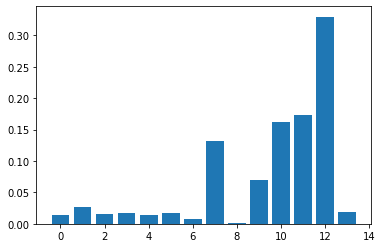

In [56]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Các đặc trưng đều có độ ảnh hưởng nhất định => chọn hết các đặc trưng

#### Các siêu tham số của Random Forest Regressor

In [64]:
# Các siêu tham số
n_estimators = [5,20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4] 
bootstrap = [True, False] 

Parameters = {  'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

#### tiến hành khảo sát siêu tham số

In [65]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor()
model_random = RandomizedSearchCV(estimator = model,param_distributions = Parameters,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
model_random.fit(X_train, y_train)

print ('Best Parameters: ', model_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}  



#### Model Random Forest ModelRegressor

In [66]:
model =RandomForestRegressor(n_estimators=model_random.best_params_['n_estimators'],
                            min_samples_split=model_random.best_params_['min_samples_split'],
                            min_samples_leaf=model_random.best_params_['min_samples_leaf'],
                            max_features=model_random.best_params_['max_features'],
                            max_depth=model_random.best_params_['max_depth'],
                            bootstrap=model_random.best_params_['bootstrap'])
model.fit(X_train, y_train)
predict_train_rd = model.predict(X_train)
predict_test_rd  = model.predict(X_test)

rs_rd = {
  "Price_Test": y_test[:30],
  "Price": predict_test_rd[:30]
}

df = pd.DataFrame(rs_rd)

print("Mean Y_test: {0}".format(np.mean(y_test)))
print("rmse of test set : {0}".format(mean_squared_error(y_test,predict_test_rd)**0.5))
print("mae of test set : {0}".format(mean_absolute_error(y_true = y_test,y_pred = predict_test_rd)))

Mean Y_test: 1330.8705035971223
rmse of test set : 991.7873269346013
mae of test set : 355.5166757632855


- 

Text(0.5, 1.0, 'Ramdom Forest Regression Predict')

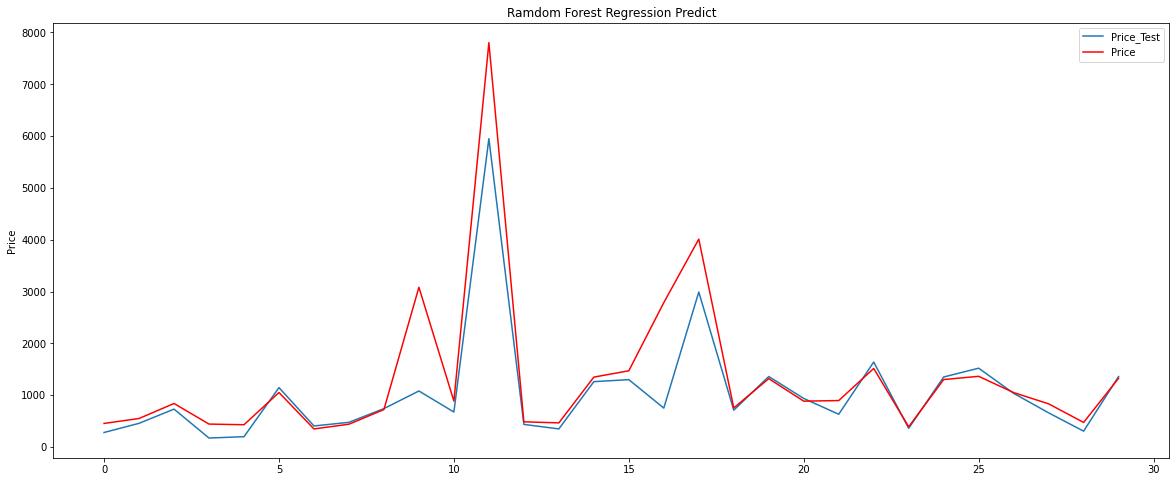

In [67]:
plt.figure(figsize = (20, 8))
sns.lineplot(x = np.arange(30), y = df['Price_Test'].head(50), label = 'Price_Test')
sns.lineplot(x = np.arange(30), y = df['Price'].head(50), label = 'Price' , color = 'red')
plt.ylabel('Price')
plt.title('Ramdom Forest Regression Predict')

Nhìn chung giá trị dự đoán và giá trị test gần như trùng nhau , điều này cho thấy mô hình đưa ra kết quả tốt , không bị sai số quá nhiều , kết quả ở mức chấp nhận

# So sánh 2 model: Linear Regression vs Random Forest Regressor

In [68]:
report = {
    'Model': ['RMSE', 'MAE'],
    'Linear Regression': [mean_squared_error(y_test,predict_test)**0.5, mean_absolute_error(y_true = y_test,y_pred = predict_test)],
    'Random Forest Regressor': [mean_squared_error(y_test,predict_test_rd)**0.5, mean_absolute_error(y_true = y_test,y_pred = predict_test_rd)]
}
df_report = pd.DataFrame(report)
df_report

,Model,Linear Regression,Random Forest Regressor
0,RMSE,1408.325809,991.787327
1,MAE,786.347643,355.516676


- Random Forest Regressor tạo ra kết quả tốt hơn, hoạt động tốt trên các tập dữ liệu hiện tại so với Linear Regression
- Hồi quy tuyến tính là một mô hình tuyến tính, vì thế với tập dữ liệu phi tuyến tính như dữ liệu này thì thuật toán Linear Regression	cho ra kết quả xấu hơn